In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
iris = pd.read_csv('iris-data.csv')
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris.shape

(148, 5)

In [6]:
def clean_data(df):
    # Check for missing values
    print(df.isnull().sum())

    # Check for duplicates
    print(df.duplicated().sum())

    # Drop duplicates
    df.drop_duplicates(inplace=True)

    # Impute missing values
    df.fillna(df.median(), inplace=True)

    # Check for outliers
    print(df.describe())

    # Remove outliers
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df

In [10]:
iris_clean = clean_data(iris)

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64
0
       sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm
count       148.000000      148.000000       148.000000      148.000000
mean          5.648608        3.056757         3.764865        1.241892
std           1.320186        0.435056         1.763109        0.739462
min           0.055000        2.000000         1.000000        0.100000
25%           5.100000        2.800000         1.600000        0.400000
50%           5.700000        3.000000         4.350000        1.300000
75%           6.400000        3.300000         5.100000        1.800000
max           7.900000        4.400000         6.900000        2.500000


In [11]:
iris_clean.shape

(139, 5)

In [12]:
iris_clean.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
iris_clean.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,139.000000,139.000000,139.000000,139.000000
mean,5.858273,3.053237,3.804317,1.264748
std,0.821884,0.393848,1.782925,0.745699
min,4.400000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.000000,6.900000,2.500000


In [26]:
iris_clean['class'].value_counts()

Iris-virginica     49
Iris-setosa        45
Iris-versicolor    39
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [35]:
iris_clean['class'].replace(['versicolor', 'Iris-setossa'], ['Iris-versicolor', 'Iris-setosa'], inplace=True)

<AxesSubplot:xlabel='class', ylabel='count'>

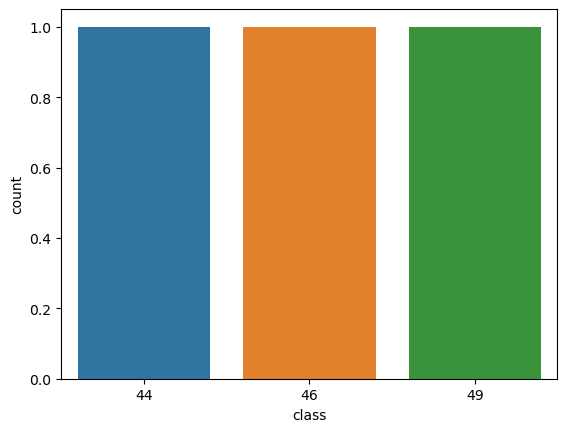

In [36]:
sns.countplot(iris_clean['class'].value_counts())

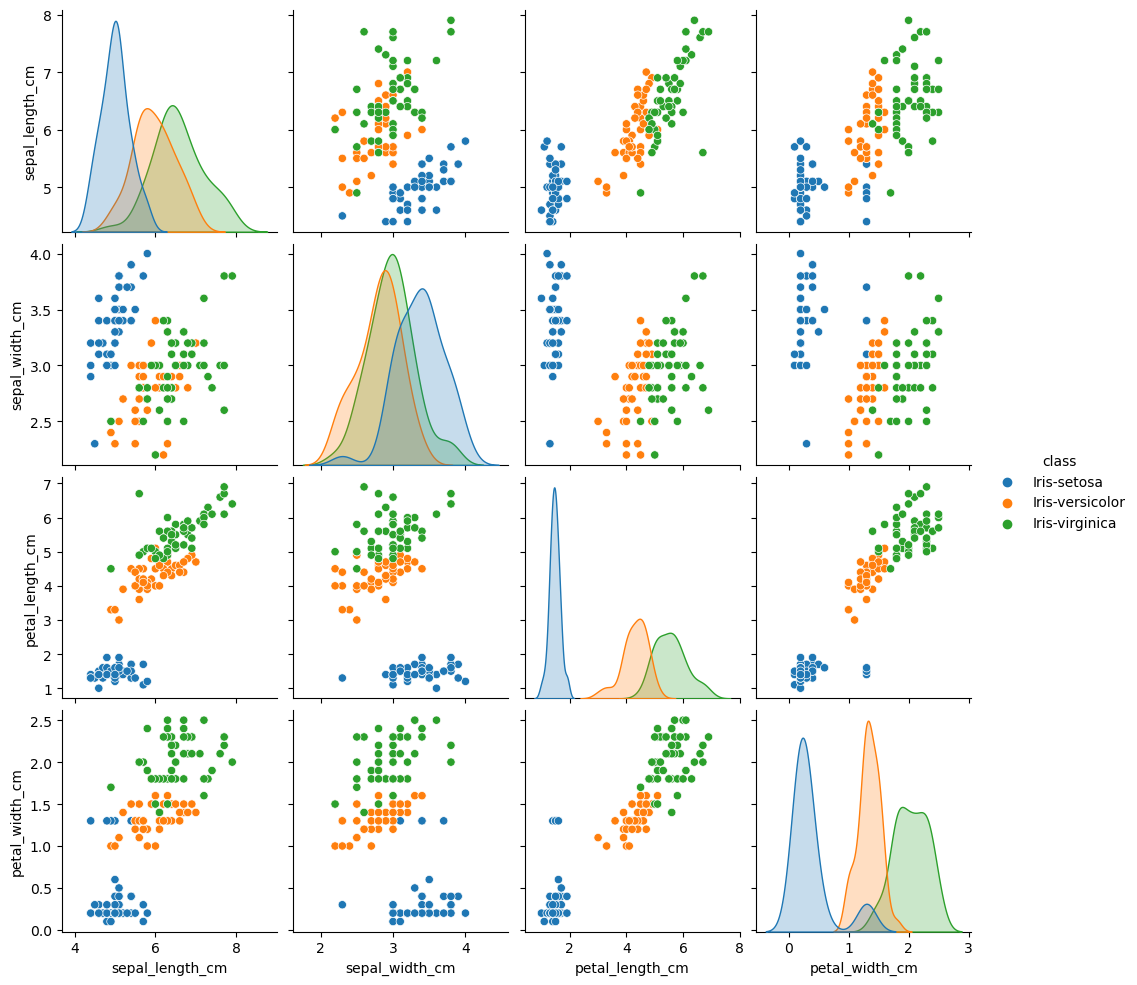

In [37]:
# Visualize the whole dataset
sns.pairplot(iris_clean, hue='class')

In [38]:
# Separate features and target  
data = iris_clean.values
X = data[:,0:4]
Y = data[:,4]

In [40]:
# Calculate average of each features for all classes
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
#The Y_Data is a 1D array, but we have 4 features for every 3 classes. 
# So we reshaped Y_Data to a (4, 3) shaped array
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1) #Then we change the axis of the reshaped matrix.
X_axis = np.arange(len(iris_clean.columns)-1)
width = 0.25

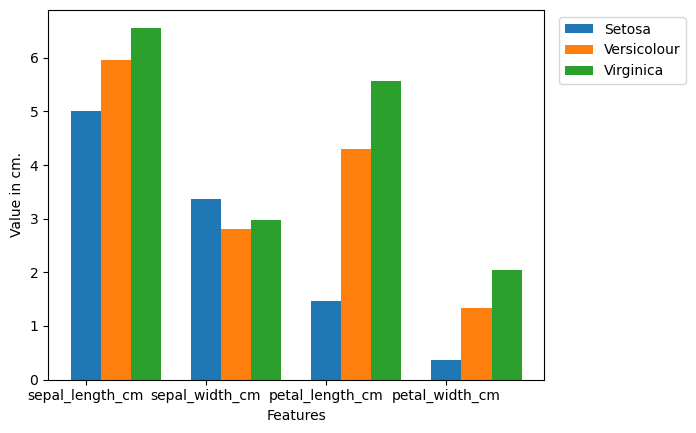

In [41]:
# Plot the average
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, iris_clean.columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

<AxesSubplot:>

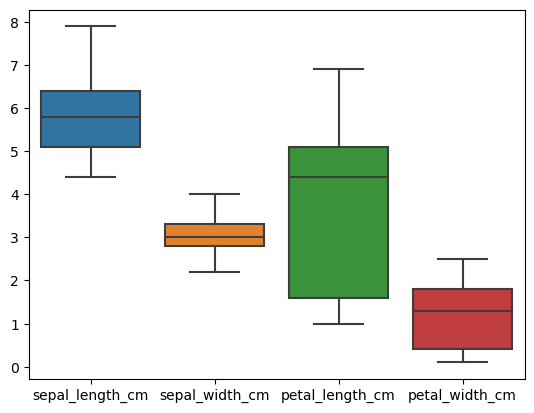

In [43]:
sns.boxplot(data=iris_clean)

In [44]:
# Split the data to train and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [45]:
# Support vector machine algorithm
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

In [46]:
# Predict from the test dataset
predictions = svn.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0

In [47]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         7

       accuracy                           1.00        28
      macro avg       1.00      1.00      1.00        28
   weighted avg       1.00      1.00      1.00        28



The classification report gives a detailed report of the prediction.
Precision defines the ratio of true positives to the sum of true positive and false positives.
Recall defines the ratio of true positive to the sum of true positive and false negative.
F1-score is the mean of precision and recall value.
Support is the number of actual occurrences of the class in the specified dataset.

some random values based on the average plot to see if the model can predict accurately.

In [49]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor']
